<a href='https://fihm.ai/' target='_blank'><img src='https://i.postimg.cc/Y25KhxPM/q.png' border='0' width = 250 alt='q'/></a>

# `تطبيق عملي لعملية [استخراج، تحويل، تحميل] باستخدام البايثون`
# ِ`Practical Implementation of ETL Process with Python`

## `مقدمة`
`إن إدارة البيانات بشكل إحترافي هو أساس النجاح لأية مشروع في علم البيانات. فقبل أن نتحدث عن نوع الخوارزمية التي نريد استعمالها، أو ماهي معايير تقييم دقة النموذج، علينا أن نتأكد أولا من جودة البيانات وسهولة الوصول إليها. في هذا الدرس سنتطرق إلى أحد أهم العمليات في إدارة البيانات والتي تعرف بعملية الاستخراج، ثم التحويل، ثم التحميل (الإي تي إل). هذه العملية تهدف إلى استخراج البيانات من مصادر متعددة، ثم إجراء عمليات التحويل اللازمة، ثم تحميلها إلى قاعدة البيانات، من أجل ضمان سهولة وسرعة الوصول إلى البيانات من قبل محللي البيانات وأصحاب القرار`


##  `أهداف الدرس` 
#####   `قراءة الملفات بالصيغ التالية • `
#####  `(JSON,CSV, XML)`
#####     ` استخراج البيانات من هذه الملفات و إجراء التحويلات اللازمة •`
#####     ` جمع الملفات بملف واحد قابل للتحميل على قاعدة البيانات •`

##  `ماذا نريد أن نفعل؟` 
#####   `أولا: هناك تسع ملفات مختلفة تحتوي على اسم، طول، ووزن العميل • ` 
#####     `ثانيا: صيغ الملفات هي سي إس في، جيسون، إكس إم إل. إذا، نحتاج أن ننشئ وظيفة مخصصة لكل نوع من أجل قراءة البيانات من هذه الملفات •` 
#####     `ثالثا: نلاحظ أيضا أن وزن العميل مسجل بالباوند، سنقوم بإجراء تحويل لقيمة الوزن من الباوند إلى الكيلوجرام •`
##### `أخيرا: نجمع جميع البيانات في ملف سي إس في واحد من أجل تحميله في قاعدة البيانات •`

### `Step one: Import necessary libraries — الخطوة الأولى: استدعاء المكتبات اللازمة`

In [1]:
import glob                         # To select files that encompass data. لتحديد الملفات المراد استخراج البيانات منها 
import pandas as pd                 # To read CSV and JSON files. لقراءة ملفات السي إس في والجيسون
import xml.etree.ElementTree as ET  # To read XML files. لقراءة ملفات الإكس إم إل
from datetime import datetime       # To log the dates of ETL steps. لتسجيل توقيت العمليات

### `Step two: Extract data from various sources — الخطوة الثانية: استخراج البيانات من مصادر متعددة `

`كما هو واضح أمامنا، لدينا تسع ملفات بثلاث صيغ مختلفة. هذه الملفات تحتوي على معلومات العملاء، مهمتنا هي إخراج البيانات منها وجمعها في ملف واحد`

<img src="https://i.ibb.co/7QphMfQ/different-sources.png" alt="drawing" width="600"/>

#### ` ETL  نقوم الآن بإنشاء الملفات والوظائف التي سوف نستخدمها في عملية الـ`

`إن الكود البرمجي في الأسفل مسؤول عن إنشاء ملفين. الملف الأول هو ملف سنقوم بتسجيل تواريخ ومواعيد العمليات فيه. والملف الثاني هو الملف الذي سوف نضع فيه البيانات بعد جمعها وتحويلها`

In [2]:
logfile    = "logfile.txt"            # The event logs will be written in this file. سوف يتم تسجيل مواعيد العمليات في هذا الملف
targetfile = "transformed_data.csv"   # The final file that includes all of the processed data. الملف النهائي الذي يحتوي على البيانات المعالجة

#### `Function1: CSV data extraction — استخراج البيانات من ملفات السي إس في`

In [3]:
# CSV extraction code is straightforward — نستطيع كتابة كود استخراج البيانات من السي اس في بطريقة مباشرة
def extract_from_csv(file_to_process):
    dataframe = pd.read_csv(file_to_process)
    return dataframe

#### `Function2: JSON data extraction — استخراج البيانات من ملفات الجيسون ` 

In [4]:
# JSON extraction is also straightforward — استخراج البيانات من ملف الجيسون أيضا يمكن تطبيقه بطريقة مباشرة
def extract_from_json(file_to_process):
    dataframe = pd.read_json(file_to_process, lines=True)
    return dataframe

#### `Function3: XML data extraction — استخراج البيانات من ملفات الإكس إم إل `

In [5]:
# In XML files, we need to be more specific in our code to extract correct information.
# عند استخراج البيانات من ملفات الإكس إم إل، نحتاج إلى كتابة أكواد محددة تتناسب مع البيانات المتواجدة في ملف الإكس إم إل 

def extract_from_xml(file_to_process):
    dataframe = pd.DataFrame(columns=["name", "height", "weight"])
    tree = ET.parse(file_to_process)
    root = tree.getroot()
    for person in root:
        name = person.find("name").text
        height = float(person.find("height").text)
        weight = float(person.find("weight").text)
        xml_df = pd.DataFrame({"name":[name], "height":[height], "weight":[weight]})
        dataframe = pd.concat([dataframe,xml_df],ignore_index = True)
    return dataframe

#### `Function4: Extract process — عملية الاستخراج `

In [6]:
# We will define a function that runs all the previous extractions functions 
# سنقوم بتعريف وظيفة تقوم بتشغيل جميع الوظائف التي تم تعريفها مسبقا
def extract(): 
    
    #  We will create an empty dataframe to hold extracted data
    #  سنقوم بعمل إطار بيانات فارغ ونقوم بجمع البيانات فيه
    extracted_data = pd.DataFrame(columns=['name','height','weight']) # The dataframe has 3 columns - اطار البيانات الذي نريد وضع البيانات فيه يحتوي على ثلاثة عواميد
    
    # We loop through all the csv files in the working directory
    # نقوم بزيارة جميع ملفات السي إس في الموجودة في مسار العمل (أي المسار الذي فيه الملفات حاليا)
    for csvfile in glob.glob("*.csv"): 
        
        # We read the csv file, and add its data to the 'extracted_data' dataframe
        # 'extracted_data' نقوم بقراءة البيانات وإضافتها إلى إطار البيانات الذي نريد تجميع البيانات فيه
        extracted_data = pd.concat([extracted_data, extract_from_csv(csvfile)], ignore_index=True) 
        
    # We repeat the same process for json and xml files
    # نقوم بإعادة نفس العملية لملفات الجيسون والإكس إم إل
    for jsonfile in glob.glob("*.json"):
        extracted_data = pd.concat([extracted_data, extract_from_json(jsonfile)], ignore_index=True)
        
    for xmlfile in glob.glob("*.xml"):
        extracted_data = pd.concat([extracted_data, extract_from_xml(xmlfile)], ignore_index=True)
        
    return extracted_data

In [7]:
# if you don't know what is your current working directory, run this line
# إن كنت لا تعلم ماهو مسار العمل الحالي لديك، شغل الكود الذي بالأسفل
!pwd
# Make sure to place data files in the same working directory path
# تأكد من أن جميع ملفات البيانات موجودة في مسار العمل الذي ظهر لك

/Users/salahkaf/Desktop


### `Step three: Transform data — الخطوة الثالثة: إجراء التحويلات اللازمة على البيانات`

#### `Function 5: Transform process — عملية التحويل `

In [8]:
def transform(data):
    
        # Convert the datatype of the column into float
        # سنقوم بتحويل نوع عامودي الطول والوزن إلى النوع فلوت (أرقام تحتوي على فواصل)
        data[['height','weight']] = data[['height','weight']].astype(float) 
        
        # Convert pounds to kilograms and round off to two decimals(one pound is 0.453592 kilograms)
        # نقوم بضرب الوزن بقيمة 0.453592 ثم نقرب الرقم إلى أقرب جزء من مئة
        data['weight'] = round(data.weight * 0.453592,2)
        return data

### `Step four: Load data — الخطوة الرابعة: تحميل البيانات`
#### `Function 6: Load process — عملية التحميل`

In [9]:
def load(targetfile,data_to_load): 
    # We take the final dataframe that includes the combined and transformed data, and save it in the target file
    #  سوف نقوم بأخذ إطار البيانات الذي يحتوي على البيانات المجمعة والمحولة، وحفظه في ملف السي إس في المنشأ سابقا 
    data_to_load.to_csv(targetfile)  

### `Step five: Deploy ETL — ETLالخطوة الخامسة: تنفيذ عملية الـ`

`إنه من المعتاد أتمتة عملية الإي تي إل، ولذلك يستحسن القيام بعمل برنامج يقوم بتسجيل كل خطوة حصلت وموعد حصولها من أجل مراقبة الأداء وتحديد الأخطاء إن وجدت`

#### `Function 7: logging process — عملية التسجيل`

In [10]:
# We will define a logging function to keep tracking ETL steps
# هذه الوظيفة ستقوم بتسجيل توقيت حدوث كل عملية من عمليات الـإي تي إل

def log(message):
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second
    now = datetime.now() # get current timestamp - أخذ الوقت الحالي
    timestamp = now.strftime(timestamp_format)
    
    # We create a txt file to write the loggings in it.
    # نقوم بكتابة التواريخ والأوقات في ملف التكست المنشأ سابقا 
    with open("logfile.txt","a") as log:
        log.write(timestamp + ',' + message + '\n')

### `ETL starts - بدأ عملية الإي تي إل`

In [11]:
log("ETL Job Started") # Log the start time — تسجيل وقت البداية

In [12]:
log("Extract phase Started") # Log 'the extraction has started' — تسجيل أن عملية الاستخراج بدأت
extracted_data = extract()
log("Extract phase Ended") # Log 'the extraction has ended' — تسجيل أن عملية الاستخراج انتهت

display(extracted_data.head()) 

,name,height,weight
0,Ahmed,1.82,172.99
1,Salah,1.73,156.49
2,Khalid,1.71,203.03
3,Nasser,1.48,142.34
4,Abdallah,1.75,184.3


`نلاحظ أن البيانات قد استخرجت، ولكن ما زلنا نحتاج إلى تحويل عامود الوزن`

In [13]:
log("Transform phase Started") # Log 'the transformation has started' — تسجيل أن عملية التحويل بدأت
transformed_data = transform(extracted_data) 
log("Transform phase Ended") # Log 'the transformation has ended' — تسجيل أن عملية التحويل انتهت
transformed_data.head()

,name,height,weight
0,Ahmed,1.82,78.47
1,Salah,1.73,70.98
2,Khalid,1.71,92.09
3,Nasser,1.48,64.56
4,Abdallah,1.75,83.60


`الآن نحتاج فقط إلى حفظ إطار البيانات الجديد في ملف سي إس في لكي نستطيع لاحقا رفعه على قاعدة البيانات`

In [14]:
log("Load phase Started") # Log 'the loading has started' — تسجيل أن عملية التحميل بدأت
load(targetfile,transformed_data)
log("Load phase Ended") # Log 'the loading has ended' — تسجيل أن عملية التحميل انتهت

In [15]:
log("ETL Job Ended") # Log 'the ETL has ended' — تسجيل أن عملية الإي تي إل انتهت

`نستطيع الآن التحقق من النتائج`

In [16]:
display(transformed_data.head())
display(transformed_data.tail())

,name,height,weight
0,Ahmed,1.82,78.47
1,Salah,1.73,70.98
2,Khalid,1.71,92.09
3,Nasser,1.48,64.56
4,Abdallah,1.75,83.60


,name,height,weight
34,Hazem,1.78,60.89
35,Fahad,1.72,78.19
36,Yaqoub,1.68,68.34
37,Shahad,1.58,60.53
38,Maha,1.55,65.38


In [17]:
display(transformed_data.describe().T)
display(transformed_data.info())

,count,mean,std,min,25%,50%,75%,max
height,39.0,1.682564,0.107550,1.44,1.620,1.70,1.75,1.90
weight,39.0,69.995641,13.865491,51.39,60.675,67.72,78.33,115.35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    39 non-null     object 
 1   height  39 non-null     float64
 2   weight  39 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


None

` نستطيع أيضاالتحقق من مواعيد العمليات وإذا ما اكتملت المهمات بالفعل `

In [18]:
# Open the file in "read" mode ('r') 
with open('logfile.txt', 'r') as text:
    textfile = text.read()
print(textfile)

2022-Oct-03-11:57:22,ETL Job Started
2022-Oct-03-11:57:22,Extract phase Started
2022-Oct-03-11:57:23,Extract phase Ended
2022-Oct-03-11:57:23,Transform phase Started
2022-Oct-03-11:57:23,Transform phase Ended
2022-Oct-03-11:57:23,Load phase Started
2022-Oct-03-11:57:23,Load phase Ended
2022-Oct-03-11:57:23,ETL Job Ended



### `Bonus Step: Analyze data — خطوة إضافية: تحليل البيانات `
`الآن وبعد أن تم جمع البيانات في جدول واحد منظم. نستطيع إجراء بعض التحليلات الاسكتشافية والمعروفة بـ`

`Exploratory Data Analysis (EDA)`

In [19]:
# We have the following list that identify the gender of each customer.
# لدينا الآن قائمة إضافية تحتوي على معلومات عن جنس العميل (ذكر أو أنثى)
gender = ['M','M','M','M','M','M','M','M','M','M','M','M','M','F','M','F','F','F','F','F','F','F','F','F','F','F','F'
         ,'F','M','M','F','M','M','F','M','M','M','F','F']

# We add the list as a column as follows
# نقوم بإضافة القائمة إلى الجدول كالتالي
transformed_data['gender'] = gender
transformed_data.sample(10) # We pull 10 random columns to check - نقوم بسحب عشرة عواميد بشكل عشوائي للتأكد من صحة الكود

,name,height,weight,gender
13,Najwa,1.68,53.22,F
35,Fahad,1.72,78.19,M
23,Hind,1.44,54.11,F
30,Noha,1.62,60.82,F
33,Kholod,1.53,57.81,F
3,Nasser,1.48,64.56,M
0,Ahmed,1.82,78.47,M
14,Talal,1.54,56.38,M
29,Mossab,1.79,80.49,M
34,Hazem,1.78,60.89,M


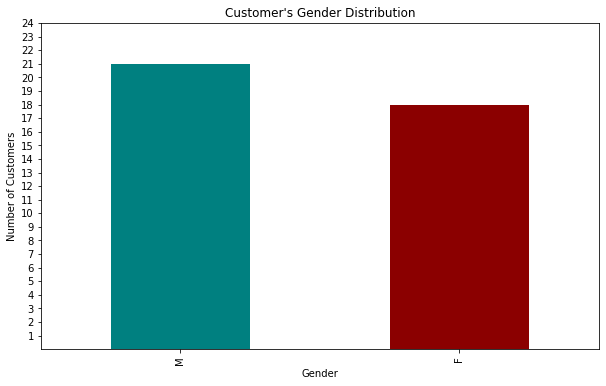

In [20]:
# We will import two libraries to do EDA via plotting
# سنقوم باستداعاء مكتبتين إضافيتين من أجل تحليل استكشافي عن طريق الرسم

import matplotlib.pyplot as plt # Used for plotting - ستستخدم من أجل الرسم
import numpy as np # Used to specify yticks - ستستخدم من أجل تحديد مؤشرات خط ص (او المعروف بواي أكسيس)

# First we wrtie the plotting code - نقوم بكتابة كود الرسم
transformed_data.gender.value_counts().plot(kind = 'bar',figsize=(10,6), color = ['teal','darkred']) 
# Then, we specify labels - ثم نقوم بكتابة العناوين
plt.title("Customer's Gender Distribution") # Plot title - عنوان الرسمة
plt.xlabel('Gender') # X-axis title - عنوان خط س
plt.ylabel('Number of Customers'); # Y-axis title - عنوان خط ص
plt.yticks(np.arange(1, 25, 1)); # Specify number of ticks on y axis - تحديد عدد المؤشرات على خط ص



`نستطيع أن نستنتج من الرسمة التي رسمناها بالأعلى، والتي تعرف بشريط الرسم البياني، أن عدد العملاء الذكور أكثر من الإناث. حيث أنه وفقا لتوزيع أعداد العملاء، لدينا إحدى وعشرون عميلا ذكر، و ثمانية عشر عميلة أنثى`

`بالإضافة إللى ذلك، إن أردنا التعمق أكثر، نستطيع رسم توزيع أوزان وأطوال العملاء بناء على جنسهم. هذه الرسمة تعرف بالرسم البياني المربع أو البوكس بلوت. وهي رسمة مثالية للتحقق من كيفية توزيع البيانات كما بالإسفل`


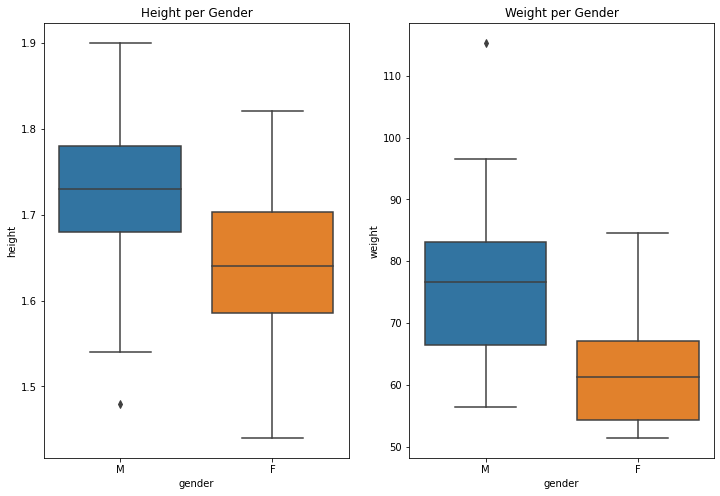

In [21]:
import seaborn as sns # We import seaborn library to do box plot - نقوم باستدعاء مكتبة سيبورن من إجل رسم الرسم البياني المربع

plt.figure(figsize=(12,8)) # We specify the size of the figure نقوم بتحديد حجم الرسمة
plt.subplot(1,2,1) # We use subplot to split the plot into two subplots - سوف نقوم بفصل الرسمة إلى رسمتين مصغرتين ودمجهم سويا
sns.boxplot(x='gender',y='height', data=transformed_data) # Plot height relative to gender - رسم الطول بالنسبة للجنس
plt.title('Height per Gender')
plt.subplot(1,2,2)
sns.boxplot(x='gender', y='weight',data=transformed_data) # Plot weight relative to gender - رسم الوزن بالنسبة للطول
plt.title('Weight per Gender');

` من هذا الرسم البياني نستطيع أن نستنتج أن قيمة أوزان العملاء الذكور وأطوالهم أعلى من العملاء الإناث. وهو استنتاج منطقي بناء على الأرقام` 

##  `ماذا تعلمنا؟` 
#####   `إن إدارة البيانات جزء ضروري من أجل نجاح مشاريع علم البيانات والذكاء الاصطناعي • ` 
#####     `عملية الإي تي إل هي أحد أهم العمليات في إدارة البيانات، وهي تختلف بحسب المشروع • `
#####     `نقوم بالعادة بأتمتة هذه العملية، ولذلك يفضل تسجيل مواقيت كل خطوة من أجل مراقبة العملية وحمايتها من الأخطاء • `